In [37]:
import numpy as np
from matplotlib import pyplot
import pandas
from sklearn import svm

import utils

In [3]:
data,labels = utils.load_iris()

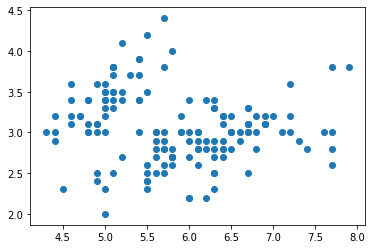

In [7]:
pyplot.scatter(data[:,0], data[:,1])

In [9]:
ec = {
    flower: np.where(labels==flower)[0] 
    for flower in np.unique(labels)
}

In [11]:
ec['Iris-setosa']

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

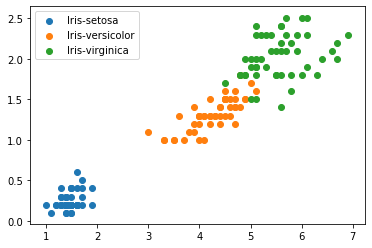

In [16]:
for k,v in ec.items():
    pyplot.scatter(data[v,2], data[v,3], label=k)
pyplot.legend()


In [18]:
# Where does the data science come in?
#from sklearn import linear_model, svm

In [25]:
svc = svm.LinearSVC()

svc.fit(data, labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [27]:
print( svc.coef_ )
print( svc.intercept_ )

[[ 0.18423608  0.45122419 -0.80794399 -0.45071602]
 [ 0.06384393 -0.89731272  0.39975157 -0.95459136]
 [-0.85072549 -0.98662765  1.38081862  1.86537862]]
[ 0.10956027  1.65868034 -1.70952904]


In [28]:
svc.coef_.shape

(3, 4)

In [31]:
vals = svc.decision_function(data)

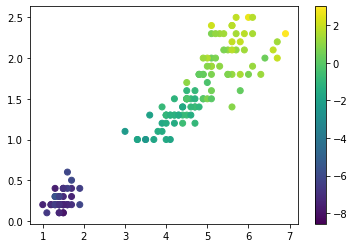

In [50]:
#for k,v in ec.items():
pyplot.scatter(data[:,2], data[:,3], c=vals[:,2])
pyplot.colorbar()

In [39]:
predicted = svc.predict(data)

In [41]:
print( predicted[:5] )
print( labels[:5] )


['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [46]:
print( sum(predicted==labels) )
print( len(labels) )

sum(predicted==labels)/len(labels)

145
150


0.9666666666666667

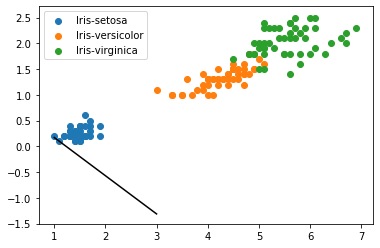

In [48]:
for k,v in ec.items():
    pyplot.scatter(data[v,2], data[v,3], label=k)
pyplot.legend()

x = np.linspace(1,3,101)
y = (1.7 - 1.38*x)/1.86
pyplot.plot(x,y, c='k')

In [ ]:
# 1.38x  + 0y -1.70 = 0
# y = (+1.70 - 1.38x)/1.86
